### Recurrent Neural Network

#### Part 1-Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("NFLX.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
dataset_train=dataset.iloc[-1000:-100]
dataset_test=dataset.iloc[-100:]
print(dataset_train.columns.tolist())
print(dataset_test.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [4]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[278.730011],
       [277.73999 ],
       [282.070007],
       [283.880005],
       [281.      ]])

#### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.1202792 ]
 [0.11762178]
 [0.12924443]
 [0.13410283]
 [0.12637231]]
900


In [6]:
trainset.shape

(900, 1)

#### Creating a data structure with 60 timesteos and 1 output

In [7]:
x_train = []
y_train = []
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


#### Reshaping

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


#### Part 2-Building and Training the RNN

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initialising the RNN

In [10]:
regressor = Sequential()

#### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#### Adding the second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding the third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding the fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the output layer

In [15]:
regressor.add(Dense(units=1))

#### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

#### Fitting the RNN to the training set

In [17]:
regressor.fit(x_train,y_train,epochs=300,batch_size=32)

Epoch 1/300
27/27 [==============================] - 16s 190ms/step - loss: 0.0475
Epoch 2/300
27/27 [==============================] - 5s 199ms/step - loss: 0.0105
Epoch 3/300
27/27 [==============================] - 6s 215ms/step - loss: 0.0097
Epoch 4/300
27/27 [==============================] - 5s 180ms/step - loss: 0.0089
Epoch 5/300
27/27 [==============================] - 5s 177ms/step - loss: 0.0075
Epoch 6/300
27/27 [==============================] - 5s 171ms/step - loss: 0.0085 1s - l
Epoch 7/300
27/27 [==============================] - 5s 185ms/step - loss: 0.0078
Epoch 8/300
27/27 [==============================] - 5s 178ms/step - loss: 0.0074
Epoch 9/300
27/27 [==============================] - 6s 226ms/step - loss: 0.0071
Epoch 10/300
27/27 [==============================] - 5s 176ms/step - loss: 0.0067
Epoch 11/300
27/27 [==============================] - 5s 182ms/step - loss: 0.0080
Epoch 12/300
27/27 [==============================] - 5s 170ms/step - loss: 0.0077
Epoch

In [18]:
pred = regressor.predict(x_train)

#### Dataset-Test

In [19]:
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

#### inputs data is the last 60 data of train data plus true test data

In [20]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

1000 100
(160,)


In [21]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [22]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60)
(100, 60, 1)


In [23]:
predicted_price = regressor.predict(x_test)

In [24]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)  
plt.ylim(0,1200) 
plt.legend()
plt.show()

#### inputs data is the last 60 data of train data only (not use true test data)

In [26]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

In [27]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


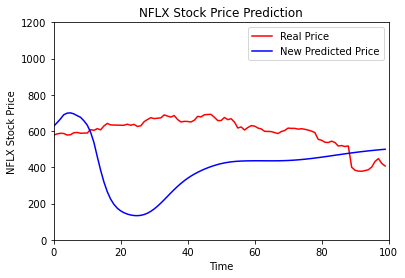

In [28]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)  
plt.ylim(0,1200) 
plt.legend()
plt.show()
